# Case Study

### Introduction

A mobile shopping platform is one of the best practices of creating a new business model based on big data and CRM technologies. This platform knows customers' preferences, shopping habits, even the number of children they have, the town their parents live, the activities they do in leisure times etc. This enables the platform to offer a personalized experience with customized campaigns designed for identified micro and macro segments based on customers' lifestyle and preferences through their transactions, without asking any questions. <br/>

Data science is the heart of this platform to enhance a rich and customized reach to its each customer. Mass amount of data is collected from online and offline sources about each customer and data science team works on utilizing this data in an insightful manner to be used in identifying shopping behaviors, motivations and needs of each customer on the path of acquisition, retention and growth models. <br/>


We prepared this notebook to test the knowledge of our fellow candidates. Good luck to all of you !!

|   cid |   month |   spending |   transaction |
|------:|--------:|-----------:|--------------:|
|     1 |       3 |      52.57 |            27 |
|     1 |       4 |      76.98 |            24 |
|     1 |       7 |      66.42 |            26 |
|     1 |       8 |      54.54 |            26 |
|     1 |       9 |     128.21 |            27 |

This is a sample transaction data of our customers:

- **cid**: Customer Id column represents the unique id assigned to each customer
- **month**: Month column represents the month of the transactions
- **spending**: Spending column represents the total paid amount within the month
- **transaction**: Transaction column represents the total number of transactions within the month

**Feel free to add as many cell you need while solving the question and add comments explaining your answer.**

## Question 1

#### Data importing & wrangling
1. Import the necessary packages and functions.
2. Read the csv data.
3. Write some code to explore the dataset. (row numbers, data types, etc.)
4. Assess data visually as well as programmatically using pandas for quality and tidiness issues. 

In [ ]:
pip install matplotlib

In [ ]:
pip install re

In [ ]:
pip install pandas

In [21]:
import pandas as pd
import matplotlib.pyplot as plt

In [15]:
# 2.Gathering the data
df = pd.read_csv("data.csv")

In [27]:
# 3.Explore the data
def explore_dataframe(df):
    print("--------------------------------------------------------")
    print("Dataframe Shape:", df.shape, "\n")
    print("Data Value Types")
    print(df.dtypes)
    print("--------------------------------------------------------")
    print(df.describe())
    print("--------------------------------------------------------")
    # Check output data in a text editor to see first 100 data values
    print("First 100 Values\n", df.head(100).to_string())
    print("--------------------------------------------------------")

explore_dataframe(df)


--------------------------------------------------------
Dataframe Shape: (74669, 4) 

Data Value Types
cid              int64
month            int64
spending       float64
transaction      int64
dtype: object
--------------------------------------------------------
                cid         month      spending   transaction
count  74669.000000  74669.000000  74669.000000  74669.000000
mean    5007.502029      6.502404    106.310297     29.495641
std     2883.623913      3.454033     97.689002      9.793271
min        1.000000      1.000000     25.920000      2.000000
25%     2506.000000      4.000000     56.060000     23.000000
50%     5015.000000      6.000000     79.490000     28.000000
75%     7502.000000     10.000000    120.890000     34.000000
max    10000.000000     12.000000   3512.160000    148.000000
--------------------------------------------------------
First 100 Values
     cid  month  spending  transaction
0     1      3     52.57           27
1     1      4     76.98

In [28]:
# 4.Check quality

# Drop missing rows
df = df.dropna()

# Reset index for dropped rows
df.reset_index(inplace=True, drop=True)

# Check new results
explore_dataframe(df)


--------------------------------------------------------
Dataframe Shape: (74669, 4) 

Data Value Types
cid              int64
month            int64
spending       float64
transaction      int64
dtype: object
--------------------------------------------------------
                cid         month      spending   transaction
count  74669.000000  74669.000000  74669.000000  74669.000000
mean    5007.502029      6.502404    106.310297     29.495641
std     2883.623913      3.454033     97.689002      9.793271
min        1.000000      1.000000     25.920000      2.000000
25%     2506.000000      4.000000     56.060000     23.000000
50%     5015.000000      6.000000     79.490000     28.000000
75%     7502.000000     10.000000    120.890000     34.000000
max    10000.000000     12.000000   3512.160000    148.000000
--------------------------------------------------------
First 100 Values
     cid  month  spending  transaction
0     1      3     52.57           27
1     1      4     76.98

#### Summarizing the data

We would like you to calculate these values for each customers:
1. **avg_spending:** average spending for each customer
2. **std_spending:** standart deviation of spending for each customer
3. **tot_spending:** total spending for each customer
4. **tot_transaction:** total number of transaction for each customer
5. **most_spending_month:** the month that each customer has the most spending    
6. **most_transaction_month:** the month that each customer has the most transaction
7. Print the results

The output seen as:

|   cid |   avg_spending |   std_spending |   tot_spending |   tot_transaction |   most_spending_month |   most_transaction_month |
|------:|---------------:|---------------:|---------------:|------------------:|----------------------:|-------------------------:|
|     1 |       102.39   |        86.3929 |         716.73 |               185 |                    11 |                       11 |
|     2 |        71.3813 |        48.3853 |         571.05 |               266 |                     1 |                       12 |
|     3 |        86.9167 |        50.4738 |         521.5  |               168 |                     9 |                        9 |
|     4 |        86.3875 |        54.4722 |         345.55 |               101 |                    12 |                       12 |
|     5 |       104.537  |        89.4826 |         627.22 |               169 |                    10 |                        6 |

In [26]:
avg_spending = df.groupby("cid").agg({"spending": "mean"})
std_spending = df.groupby("cid").agg({"spending": "std"})
tot_spending = df.groupby("cid").agg({"spending": "sum"})
tot_transaction = df.groupby("cid").agg({"transaction": "sum"})
most_spending_month = df.loc[df.groupby("cid")["spending"].idxmax()][["cid", "month"]].set_index("cid")
most_transaction_month = df.loc[df.groupby("cid")["transaction"].idxmax()][["cid", "month"]].set_index("cid")

In [33]:
new_df = pd.concat([avg_spending, std_spending, tot_spending, tot_transaction, most_spending_month, most_transaction_month], axis=1,)
new_df.columns = ['avg_spending', 'std_spending', 'tot_spending', 'tot_transaction', 'most_spending_month', 'most_transaction_month']
new_df.head()

,avg_spending,std_spending,tot_spending,tot_transaction,most_spending_month,most_transaction_month
cid,,,,,,
1,102.390000,86.392892,716.73,185,11,11
2,71.381250,48.385250,571.05,266,1,12
3,86.916667,50.473770,521.50,168,9,9
4,86.387500,54.472186,345.55,101,12,12
5,104.536667,89.482588,627.22,169,10,6


#### Data Understanding
1. Plot the histogram for average spending of costomer
2. Calculate mean, mode, median of the distribution (*you should round the values before calculating the mode*)
3. Explain the type of the distributon that describes the pattern in the histogram; justify your answer with mean, mode median (*you can answer this question in the comment*)

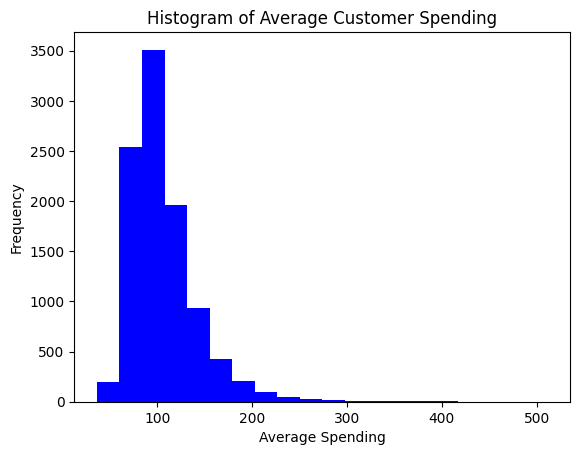

In [34]:
#1. Plot the histogram for average spending of costomer

plt.hist(avg_spending, bins=20, color='blue')

plt.xlabel('Average Spending')
plt.ylabel('Frequency')
plt.title('Histogram of Average Customer Spending')

plt.show()

In [39]:
#2. Calculate mean, mode, median of the distribution (you should round the values before calculating the mode)
print("Mean:\n", df.mean(), "\n")
print("Mode:\n", df.round().mode(), "\n")
print("Median:\n", df.median(), "\n")

Mean:
 avg_spending              106.286485
std_spending               73.054430
tot_spending              793.808353
tot_transaction           220.241000
most_spending_month         6.466400
most_transaction_month      6.393400
dtype: float64 

Mode:
    avg_spending  std_spending  tot_spending  tot_transaction  \
0          86.0          43.0         615.0              215   

   most_spending_month  most_transaction_month  
0                    4                       4   

Median:
 avg_spending               98.44500
std_spending               54.82643
tot_spending              738.43000
tot_transaction           219.00000
most_spending_month         6.00000
most_transaction_month      6.00000
dtype: float64 



In [ ]:
#3. Explain the type of the distributon that describes the pattern in the histogram; justify your answer with mean, mode median (you can answer this question in the comment)

## Question 2

#### Write a function to replace all spaces in a string with '--' using an array 
Make sure that your function O(n) runtime complexity and do not use built-in replace() function.

<b>Example input</b>: "Mr John Smith, 13" <br>
<b>Example output</b>: "Mr--John--Smith" <br>

You may assume that the array has sufficient space at the end to hold the additional characters, and you are given the true length of the string with the input. Here "13" represents the actual length of the string.

In [12]:
import re

def space_remover(input_str):    
    output_str = re.sub(r'[.,; ]+', '--', input_str)
    return output_str

In [13]:
# testing
input_str1 = 'Mr John Smith, 13'
print(space_remover(input_str1)) # expected solution is 'Mr--John--Smith'
input_str1 = 'Woow Data Science, 17'
print(space_remover(input_str1)) # expected solution is 'Woow--Data--Science'

Mr--John--Smith--13
Woow--Data--Science--17


## Question 3

#### Using regular expression do following operations on **lorem_ipsum_text**:
1. Delete all characters if they are not letters (A-z) and spaces 
2. Find the count of all occurrence of the words that ends with 'us' but not 'llus'
3. Replace all 'ae' with 'æ', (*Don't forget 'Aenean => Ænean'*)
3. Replace all the vowels following by 'll' if the word does not end with that vowel as:
    - a => @ (ex: nullam => null@m, but nulla => nulla)
    - e => 3
    - i => %
    - o => 0
    - u => &

Print the results

In [ ]:
import re

lorem_ipsum_text = """Lorem ipsum dolor sit amet, consectetur adipiscing elit. Ut sed rhoncus sem, et sagittis tellus. Donec hendrerit sapien ac purus pretium tincidunt. Orci varius natoque penatibus et magnis dis parturient montes, nascetur ridiculus mus. Pellentesque aliquet, lectus eget finibus aliquet, tortor quam semper justo, sed venenatis nunc lectus a arcu. Vivamus egestas rhoncus dolor, vitae sollicitudin urna. Integer eleifend purus eget porta sagittis. Phasellus malesuada ex nibh, a lobortis tellus tempor hendrerit. Integer tincidunt ante et varius semper. Maecenas quis finibus lacus.
Sed luctus varius nisi, ac pulvinar erat gravida sit amet. Mauris gravida scelerisque nisi vel sollicitudin. In porta diam nec lorem bibendum semper. Cras ut imperdiet sem, vel bibendum risus. Nulla suscipit enim et efficitur interdum. Mauris consectetur porttitor ipsum. Praesent a tortor quis arcu porttitor ullamcorper ac et diam. Pellentesque rhoncus ultrices facilisis. Pellentesque lectus quam, vestibulum in erat non, venenatis vehicula augue. Praesent at viverra est. Integer libero neque, commodo ut ipsum ac, vulputate pharetra libero. Pellentesque in rhoncus magna. In hac habitasse platea dictumst.
Praesent ultrices vel elit vel auctor. Nulla vitae ligula in elit mattis aliquam. Quisque vitae finibus enim. Praesent id maximus mauris. Nunc in pulvinar ligula. Donec condimentum condimentum ipsum aliquet volutpat. Maecenas non porta nunc. Donec risus nulla, pharetra in rhoncus sit amet, efficitur quis urna.
Praesent diam ante, ultrices eget libero sit amet, semper auctor metus. Aliquam sit amet vulputate nibh. Suspendisse potenti. Duis dui ligula, consectetur egestas nibh nec, ullamcorper iaculis turpis. Ut volutpat lacus in leo porta, a lobortis diam placerat. Aenean iaculis, leo at semper fringilla, lectus magna rutrum neque, sollicitudin accumsan est felis at purus. Phasellus et scelerisque libero, ac malesuada nulla. Pellentesque maximus eget erat ac consequat. Ut elementum sapien sed leo aliquam, at ultrices elit venenatis. Duis accumsan finibus imperdiet. Vestibulum ante ipsum primis in faucibus orci luctus et ultrices posuere cubilia curae;
Nulla augue nunc, pharetra quis tellus sed, egestas luctus mi. Fusce hendrerit sagittis urna eleifend varius. Vestibulum velit magna, aliquam nec tincidunt hendrerit, aliquam non ex. Maecenas ut sem imperdiet, semper metus et, gravida quam. Mauris placerat sed erat sed dapibus. Aliquam a suscipit elit. Fusce non dolor justo. Suspendisse dictum posuere faucibus. Proin pretium ipsum vitae orci sagittis placerat. Nulla hendrerit erat sit amet nunc tristique, quis lacinia enim lobortis. Aenean in pretium augue. Proin posuere purus at nulla ultrices molestie. Morbi et pharetra justo. In vel arcu elit. Nullam at est id odio bibendum iaculis nec dapibus velit.
"""

In [ ]:

# Delete all characters that are not letters (A-z) and spaces
lorem_ipsum_text = re.sub(r'[^A-Za-z\s]', '', lorem_ipsum_text)
print(lorem_ipsum_text)


In [ ]:
#Find the count of all occurrence of the words that ends with 'us' but not 'llus'
count = len(re.findall(r'\b(?!llus)\w+us\b', lorem_ipsum_text))
print(count)

In [ ]:
# Replace all 'ae' with 'æ', (Don't forget 'Aenean => Ænean')
lorem_ipsum_text = re.sub(r'ae', 'æ', lorem_ipsum_text, flags=re.IGNORECASE)
print(lorem_ipsum_text)

In [ ]:
#Replace all the vowels following by 'll' if the word does not end with that vowel as:
lorem_ipsum_text = re.sub(r'(?<![aeiouAEIOU])a(?=[^aeiouAEIOU]*\b)', '@', lorem_ipsum_text)
lorem_ipsum_text = re.sub(r'(?<![aeiouAEIOU])e(?=[^aeiouAEIOU]*\b)', '3', lorem_ipsum_text)
lorem_ipsum_text = re.sub(r'(?<![aeiouAEIOU])i(?=[^aeiouAEIOU]*\b)', '%', lorem_ipsum_text)
lorem_ipsum_text = re.sub(r'(?<![aeiouAEIOU])o(?=[^aeiouAEIOU]*\b)', '0', lorem_ipsum_text)
lorem_ipsum_text = re.sub(r'(?<![aeiouAEIOU])u(?=[^aeiouAEIOU]*\b)', '&', lorem_ipsum_text)
print(lorem_ipsum_text)

## Question 4

You should write your code in **SQL programming language**. Don't forgot that you can not run your code in this notebook.

Consider the "Employee" table below:

| Emp_Id  | Emp_name  | Salary  | Manager_Id  |
|---|---|---|---|
| 10 | Anil  | 50000  |  18 |
| 11 | Vikas  | 75000  |   16 |
| 12 | Nisha | 40000 |  18 |
| 13 | Nidhi  | 60000 | 17  |
| 14 | Priya  | 80000 |  18 |
| 15 | Mohit |  45000 |  18 |
| 16 | Rajesh  | 90000 | -  |
| 17 | Raman  | 55000 | 16  |
| 18 | Santosh  | 65000 |  17 |

Write a query to generate below output:

| Manager_Id  | Manager  | Average_Salary_Under_Manager  |
|---|---|---|
| 16 | Rajesh  | 65000  |
| 17 | Raman  | 62500  |
| 18 | Santosh | 53750 |

In [ ]:
SELECT 
  Manager_Id, 
  Emp_Name as Manager,
  AVG(Salary) AS Avg_Salary_Under_Manager
FROM 
  Employee
GROUP BY 
  Manager_Id

##  Thank you..

In [ ]:
print("You are most welcome")